# Fraud Detection Using Self Organizing Map


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/App/Fraud-Detection-SOM/Credit_Card_Applications.csv')
features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

In [0]:
dataset.head()

In [0]:
# Feature Scaling
# To prevent any variable from overpowering the others, we need to standardize all variables.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
features = sc.fit_transform(features)

In [0]:
features.shape

In [0]:
import os
os.chdir("/content/drive/My Drive/App/Fraud-Detection-SOM")

In [0]:
from minisom import MiniSom #you need to chage the directory as above to access this file

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(features)
som.train_random(data = features, num_iteration = 100)

It is also common to use the **U-Matrix**. 

Unified Distance Matrix

The U-matrix (unified distance matrix) is a representation of a self-organizing map (SOM) where the Euclidean distance between the codebook vectors of neighboring neurons is depicted in a grayscale image. This image is used to visualize the data in a high-dimensional space using a 2D image.

The U-Matrix value of a particular node is the average distance between the node's weight vector and that of its closest neighbors. In a square grid, for instance, we might consider the closest 4 or 8 nodes (the Von Neumann and Moore neighborhoods, respectively), or six nodes in a hexagonal grid.

In [0]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()


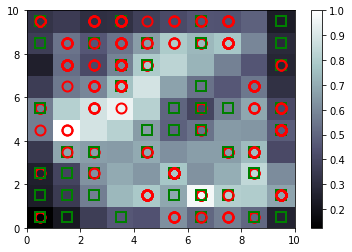

In [25]:
# Visualizing the results
# Outlier points are the customers who are fradulent as there is a anomaly in their behavior.
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(features):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[labels[i]],
         markeredgecolor = colors[labels[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
# From the result below we can observe that the dark nodes are the wining nodes and the darker shaded nodes surrounding them are the ones which are closely representing the wining node features. while the white blocks represent 
# that they are outliers and can be classified as fradulent people.
# we can distinguish people who got approval and who did not from the bank. our aim is to detect customers with bank approval and are fraudulent in nature. 
# Red circles depict the customers who did not get approval and green represents customers who got approval from the bank
# Circles represent customers with No approval and Square represents customers with Aproval.

In [0]:
# Finding the frauds
# to get the explicit customer list who have comitted to this fraud
mappings = som.win_map(features) #mappings is a dictionary

In [0]:
mappings

In [0]:
print (mappings[(6,1)])

In [0]:
#frauds = np.concatenate((mappings[(3,2)], mappings[(5,1)]), axis = 0)
frauds = mappings[(6,1)]

In [0]:

frauds = sc.inverse_transform(frauds) #as values are scalled, to get actual values of customers details, we need to do reverse of scalling

In [0]:
np.set_printoptions(suppress=True)
frauds
# from the results below we can observe the customers(customerID) who have received the approval from bank and are fradulent.


In [0]:
len(frauds)

In [0]:
import keras
print (keras.__version__)

# Other implementations of SOMs:

1. Data compression
2. Speech recognition
3. Separating sound sources
4. Fraud detection


